## <center>Task 1 : Don't patronize me</center>
#### <center>Data Visualization & Statistical analysis</center>

In [1]:
import pandas as pd
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from dont_patronize_me import DontPatronizeMe
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import string
import re
import nltk
from nltk import word_tokenize
from collections import Counter

# Imblearn methods
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE

# Text augmentation techniques
from textaugment import MIXUP

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dpm = DontPatronizeMe('.')
# This method loads the subtask 1 data
dpm.load_task1()
# which we can then access as a dataframe
dataset = dpm.train_task1_df
dataset.head()

,par_id,art_id,keyword,country,text,label,orig_label
0,1,@@24942188,hopeless,ph,"we 're living in times of absolute insanity , ...",0,0
1,2,@@21968160,migrant,gh,"in libya today , there are countless number of...",0,0
2,3,@@16584954,immigrant,ie,"""white house press secretary sean spicer said ...",0,0
3,4,@@7811231,disabled,nz,council customers only signs would be displaye...,0,0
4,5,@@1494111,refugee,ca,""""""" just like we received migrants fleeing el ...",0,0


#### Doing some data preprocessing in order to have a better overview of the frequent terms in dataset and so on

In [3]:
def text_preprocessing(text, lemmatize):
    if not isinstance(text, str):
        text = text.decode('ISO-8859-1')
    
    text = re.sub('[^a-zA-Z]', ' ', text) # Clear the special characters from our dataset
    text = text.lower() 
    text = text.split() 
    text = ' '.join(text)
    #print('\tClear Text.\n', text)

    # Tokenize
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    #print('\tTokenizing.\n', tokens)

    # Removing the stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in set(stop)]
    #print('\tRemoving the stopwords.\n', tokens)
    
    # Remove words shorter than 3 characters
    tokens = [token for token in tokens if len(token) >= 2]
    #print('\tRemoving the words shorter than 3 characters\n', tokens)
    

    if lemmatize:
        # Lemmatize
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        #print('\tLemmatizing.\n', tokens)
    else:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    
    # Preprocessed text
    tokens = ' '.join(tokens)
    
    return tokens


dataset['text'] = [text_preprocessing(doc, True) for doc in dataset.text]

### Data Visualization

In [5]:
dataset['text length'] = dataset['text'].apply(len)

<Figure size 1080x1080 with 0 Axes>

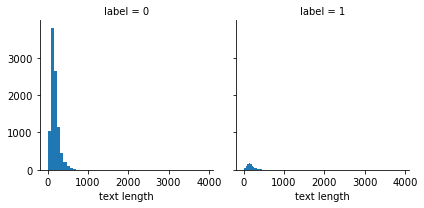

In [8]:
plt.figure(figsize = (15, 15))
graph = sns.FacetGrid(data = dataset, col = 'label')
graph.map(plt.hist, 'text length', bins = 50)

<AxesSubplot:xlabel='label', ylabel='text length'>

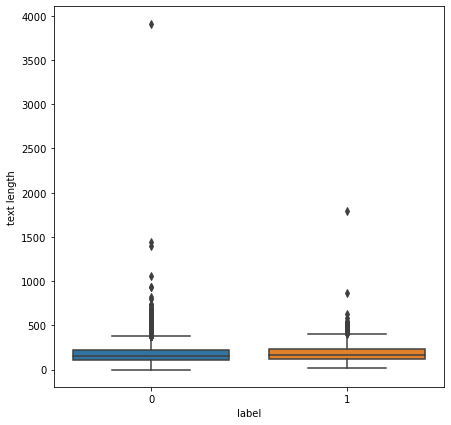

In [16]:
plt.figure(figsize = (7, 7))
sns.boxplot(x = 'label', y = 'text length', data = dataset)

From the box-plot, looks like the class 0 tweets have much longer text. There are also outliers present, so text-length won’t be a useful feature to consider.

Text(0.5, 1.0, 'Distribution of texts by labels')

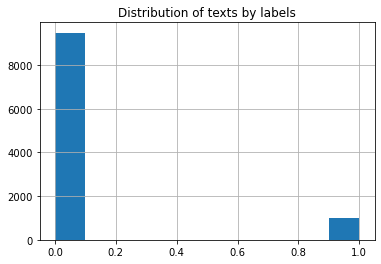

In [28]:
dataset['label'].hist()
plt.title("Distribution of texts by labels")

The above histogram shows that most of the tweets are considered to be not patronizing and condescending.

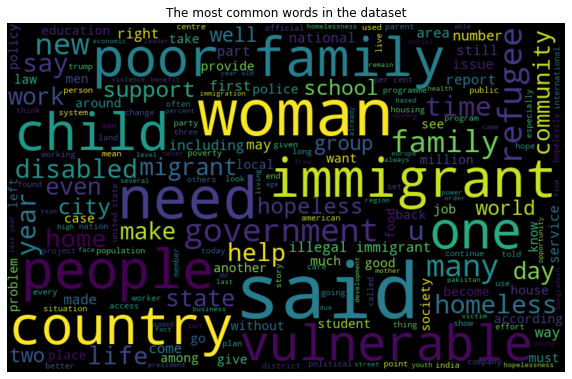

In [24]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in dataset['text'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("The most common words in the dataset")
plt.show()

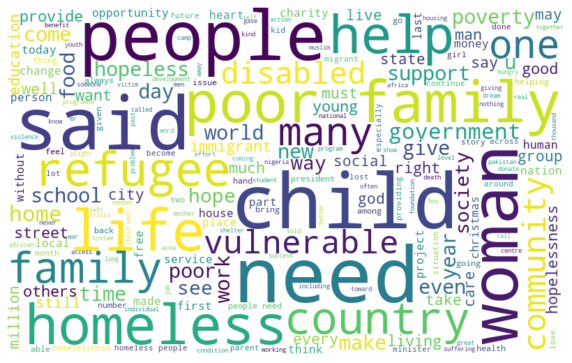

In [26]:
patronizing_words = ' '.join([text for text in dataset['text'][dataset['label'] == 1]])
wordcloud = WordCloud(background_color='white', width=800, height=500,random_state=21, max_font_size=110).generate(patronizing_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most common words for texts which patronize")
plt.show()

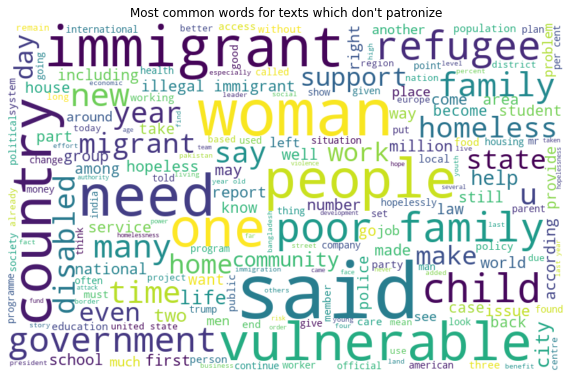

In [27]:
patronizing_words = ' '.join([text for text in dataset['text'][dataset['label'] == 0]])
wordcloud = WordCloud(background_color='white', width=800, height=500,random_state=21, max_font_size=110).generate(patronizing_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most common words for texts which don't patronize")
plt.axis('off')
plt.show()